In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
import numpy as np
import os

npz_path = "/depot/cms/users/shar1172/hmm/copperheadV1clean/TestCutFlow//stage1_output/2017"

# List of .npz files to combine
npz_files = [
    f"{npz_path}/cutflow_data_B_0.npz",
    f"{npz_path}/cutflow_data_B_1.npz"
]

# Initialize combined data
combined_nevonecut = None
combined_nevcutflow = None
combined_labels = None

# Loop through each file and combine the data
for npz_file in npz_files:
    print(f"Loading file: {npz_file}")
    data = np.load(npz_file)
    
    # Extract counts and labels
    nevonecut = data['nevonecut']
    nevcutflow = data['nevcutflow']
    labels = data['labels']
    
    # Initialize combined data if not already done
    if combined_nevonecut is None:
        combined_nevonecut = nevonecut
        combined_nevcutflow = nevcutflow
        combined_labels = labels
    else:
        # Ensure labels match across all files
        if not np.array_equal(combined_labels, labels):
            raise ValueError(f"Labels in {npz_file} do not match the combined labels!")
        
        # Add counts to the combined counts
        combined_nevonecut += nevonecut
        combined_nevcutflow += nevcutflow


# Optional: Print the combined results
print("\nCombined Cutflow:")
for label, nevonecut, nevcutflow in zip(combined_labels, combined_nevonecut, combined_nevcutflow):
    print(f"{label:25}: {nevonecut:11} : {nevcutflow}")

Loading file: /depot/cms/users/shar1172/hmm/copperheadV1clean/TestCutFlow//stage1_output/2017/cutflow_data_B_0.npz
Loading file: /depot/cms/users/shar1172/hmm/copperheadV1clean/TestCutFlow//stage1_output/2017/cutflow_data_B_1.npz

Combined Cutflow:
initial                  :   136300266 : 136300266
TotalEntries             :   136300266 : 136300266
HLT_filter               :    55622424 : 55622424
lumi_mask                :   128742175 : 52086135
muon_pT_roch             :   110500504 : 51048682
muon_eta                 :   130397981 : 50976074
muon_id                  :   123805533 : 50223251
muon_isGlobal_or_Tracker :   128805870 : 50223251
muon_selection           :   104942234 : 50127906
muon_iso                 :    85578128 : 47695348
nmuons                   :     4102991 : 3663110
mm_charge                :    34777082 : 3659141
electron_veto            :   136185553 : 3658000
event_filter             :    42612555 : 3556507


In [3]:
cutflow_file = "/depot/cms/users/shar1172/hmm/copperheadV1clean/TestCutFlow//stage1_output/2017/cutflow_data_B_0.npz"

with np.load(cutflow_file) as f:
    for i in f.files:
        print(f"{i}: {f[i]}")

labels: ['initial' 'TotalEntries' 'HLT_filter' 'lumi_mask' 'muon_pT_roch'
 'muon_eta' 'muon_id' 'muon_isGlobal_or_Tracker' 'muon_selection'
 'muon_iso' 'nmuons' 'mm_charge' 'electron_veto' 'event_filter']
nevonecut: [113680972 113680972  46076005 107053553  92271892 108765198 103256371
 107430745  87622107  71095384   3397862  28876984 113585735  35171664]
nevcutflow: [113680972 113680972  46076005  43020598  42146468  42086529  41461094
  41461094  41381562  39370159   3024723   3021440   3020504   2936765]
masksonecut: [[ True  True  True ...  True  True  True]
 [ True False False ... False  True  True]
 [ True  True  True ...  True  True  True]
 ...
 [False False  True ... False False False]
 [ True  True  True ...  True  True  True]
 [ True False False ... False  True False]]
maskscutflow: [[ True  True  True ...  True  True  True]
 [ True False False ... False  True  True]
 [ True False False ... False  True  True]
 ...
 [False False False ... False False False]
 [False False Fals

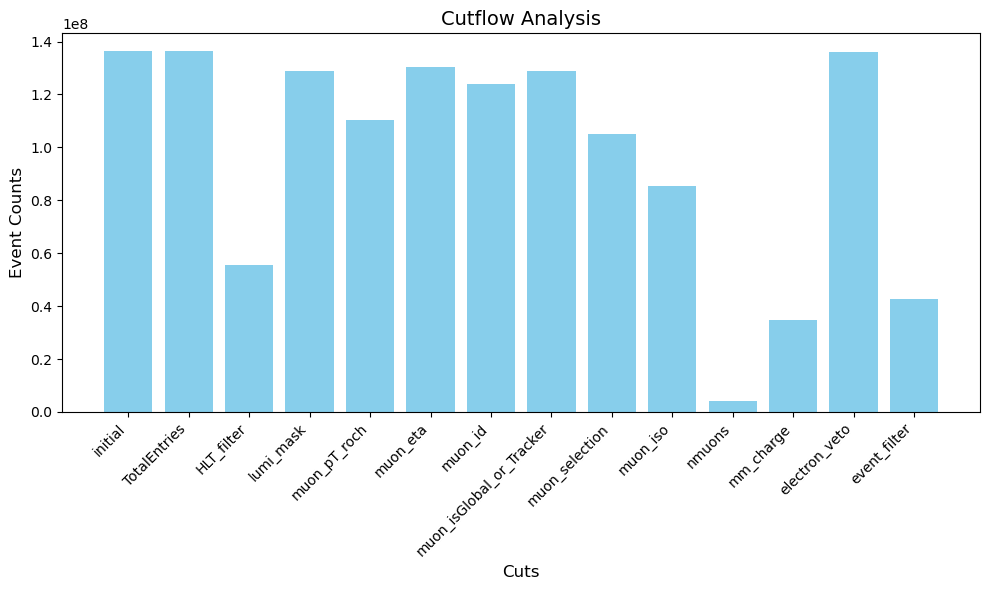

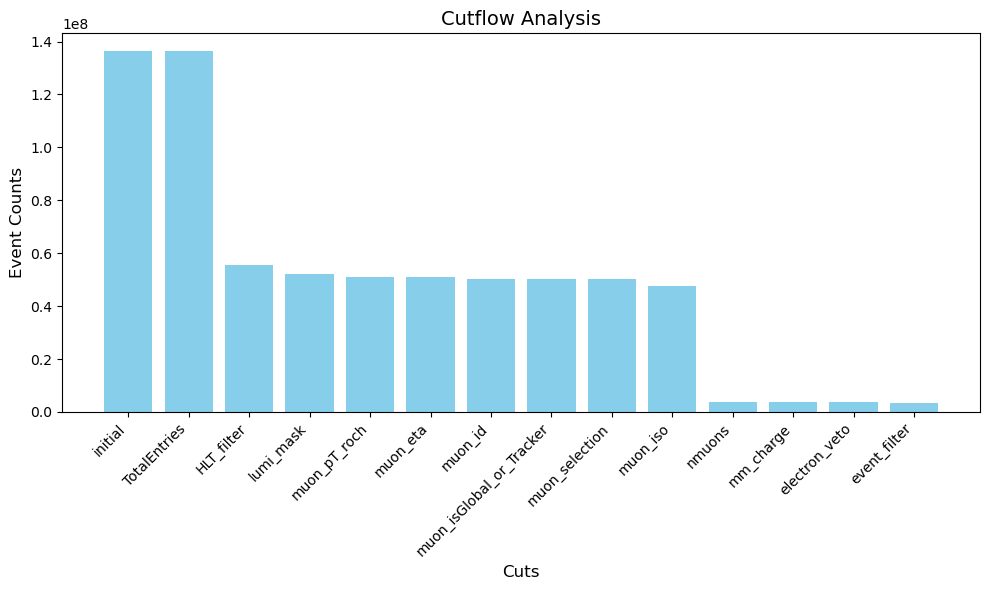

In [14]:
# Plot the cutflow
plt.figure(figsize=(10, 6))
plt.bar(combined_labels, combined_nevonecut, color='skyblue')
plt.xlabel("Cuts", fontsize=12)
plt.ylabel("Event Counts", fontsize=12)
plt.title("Cutflow Analysis", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

# Plot the cutflow
plt.figure(figsize=(10, 6))
plt.bar(combined_labels, combined_nevcutflow, color='skyblue')
plt.xlabel("Cuts", fontsize=12)
plt.ylabel("Event Counts", fontsize=12)
plt.title("Cutflow Analysis", fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()